# Data preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading the data and correcting lecture errors

In [3]:
numeric_variables = []
with open('dataset.txt', 'r') as file:
    for line in file:
        line = line.strip()
        line = line.replace('\'', '').replace('\\', '\'').replace('\'"', '"')

        data = line.split(',', 1)[1]
        n = data.count(',')
        data = data.replace(',', '', n - 13)
        data = data.split(',')
        numeric_variables.append(data)

df = pd.DataFrame(numeric_variables, columns=['Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'])
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
for header in df.columns[3:10]:
    df[header] = df[header].astype(int)
for header in df.columns[11:]:
    df[header] = df[header].astype(int)

In [5]:
df[df["Length"].str.contains("\.")==True]

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
842,Echoes,Pink Floyd,album rock,1971,134,32,28,-17,11,14,1.412,37,4,58
904,Close to the Edge (i. The Solid Time of Change...,Yes,album rock,1972,81,60,22,-11,41,25,1.121,27,6,47
951,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974,82,50,33,-16,13,11,1.367,11,4,48
1982,Get Ready,Rare Earth,blues rock,1969,127,87,41,-6,83,65,1.292,0,4,45


In [6]:
df["Length"] = df["Length"].replace(["1.412","1.121","1.367","1.292"], ['1412','1121','1367','1292'])
df["Length"] = df["Length"].astype(int)

In [7]:
df['is_recent'] = df['Year'].apply(lambda x: 1 if x >= 2000 else 0)

In [8]:
df['is_recent'].value_counts()

is_recent
0    1195
1     799
Name: count, dtype: int64

Unbalanced dataset

In [9]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['is_recent'], random_state=0)

### Analysis

In [10]:
df_train.isnull().sum()

Title           0
Artist          0
Genre           0
Year            0
BPM             0
Energy          0
Danceability    0
Loudness        0
Liveness        0
Valence         0
Length          0
Acousticness    0
Speechiness     0
Popularity      0
is_recent       0
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 387 to 393
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1395 non-null   object
 1   Artist        1395 non-null   object
 2   Genre         1395 non-null   object
 3   Year          1395 non-null   int64 
 4   BPM           1395 non-null   int64 
 5   Energy        1395 non-null   int64 
 6   Danceability  1395 non-null   int64 
 7   Loudness      1395 non-null   int64 
 8   Liveness      1395 non-null   int64 
 9   Valence       1395 non-null   int64 
 10  Length        1395 non-null   int64 
 11  Acousticness  1395 non-null   int64 
 12  Speechiness   1395 non-null   int64 
 13  Popularity    1395 non-null   int64 
 14  is_recent     1395 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 174.4+ KB


## Data preprocessing

#### Title
We have 1372 unique values out of 1395. By intuition, this feature will not provide any intuition about the year of release.  

In [12]:
df_train['Title'].nunique(), len(df_train)

(1378, 1395)

In [13]:
df_train = df_train.drop(labels=['Title'], axis=1)

Check if we have any duplicated song

In [14]:
df_train.duplicated().sum()

0

#### Artist

In [15]:
df_train['Artist'].nunique()

584

In [16]:
df_train = df_train.drop(columns=['Artist'])

# artists_freq = df_train['Artist'].value_counts().reset_index()
# top_artists = artists_freq.head(15)['Artist']

# df_train_topArtists = df_train[df_train['Artist'].isin(top_artists)]
# artist_year_range = df_train_topArtists.groupby('Artist')['Year'].agg(['min', 'max']).reset_index()

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.bar(artist_year_range['Artist'], height=artist_year_range['max'] - artist_year_range['min'], bottom=artist_year_range['min'])

# ax.set_xlabel('Artist')
# ax.set_ylabel('Year Range')
# ax.set_title('Year Range for Top Artists')
# ax.set_xticklabels(artist_year_range['Artist'], rotation=90)
# plt.show()


#### Genre

In [17]:
df_train['Genre'].nunique()

125

In [18]:
df_train

,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent
387,adult standards,2002,123,73,48,-8,11,87,140,57,17,65,1
1853,adult standards,1965,99,21,34,-17,18,29,218,40,3,70,0
1715,alternative rock,1996,71,58,39,-7,22,38,295,47,3,63,0
601,dutch hip hop,2014,135,23,40,-9,11,28,222,89,4,61,1
971,album rock,1975,159,16,41,-22,12,42,199,88,3,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,australian indie folk,2012,124,39,61,-11,11,22,255,53,4,67,1
1315,dance rock,1985,84,90,57,-8,9,88,225,2,5,83,0
1501,folk,1990,120,57,51,-7,11,16,280,4,3,71,0
1733,big beat,1997,136,99,61,-5,11,23,343,0,15,65,0


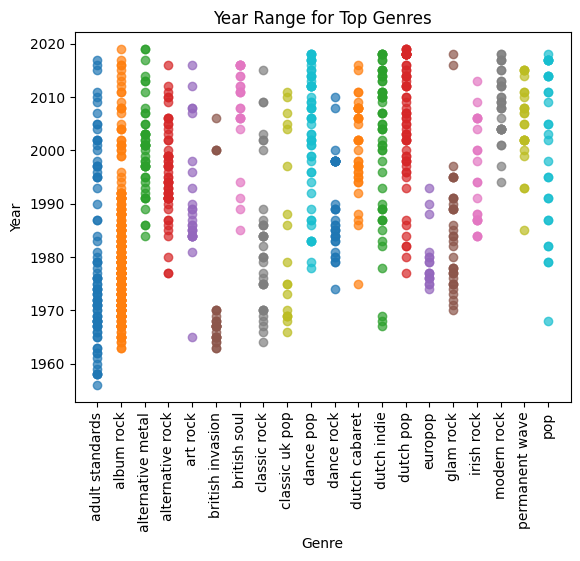

In [19]:
top_genres = df_train['Genre'].value_counts().head(20).index
df_train_topGenres = df_train[df_train['Genre'].isin(top_genres)]

fig, ax = plt.subplots()
for genre, group in df_train_topGenres.groupby('Genre'):
    ax.scatter([genre] * len(group), group['Year'], label=genre, alpha=0.7)

ax.set_xlabel('Genre')
ax.set_ylabel('Year')
ax.set_title('Year Range for Top Genres')
plt.xticks(rotation=90)
plt.show()

In [20]:
df_train['Genre'].value_counts().unique()

array([287,  88,  65,  60,  55,  46,  38,  37,  34,  32,  30,  28,  26,
        24,  22,  18,  17,  13,  12,  11,   9,   8,   7,   6,   5,   4,
         3,   2,   1])

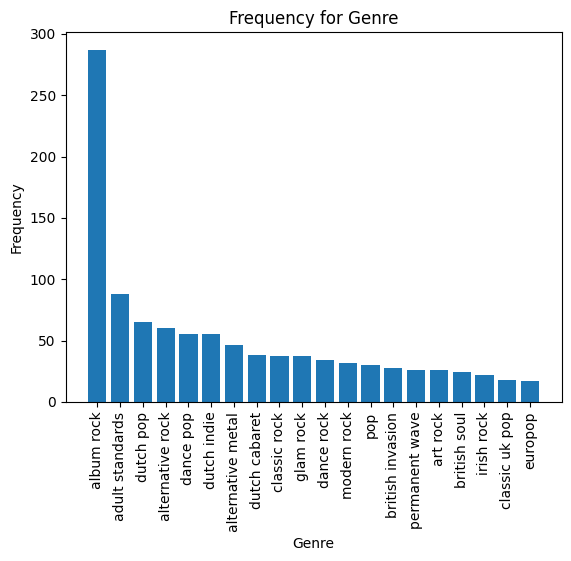

In [21]:
fig, ax = plt.subplots()
top_genres = df_train['Genre'].value_counts()
top_genres = top_genres[top_genres > 15]
ax.bar(top_genres.index, top_genres)

ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
ax.set_title('Frequency for Genre')
plt.xticks(rotation=90)
plt.show()


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

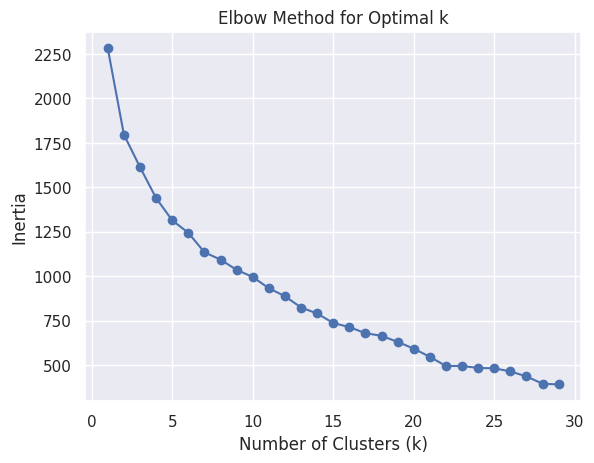

In [23]:
vectorizer = CountVectorizer()
df_train_vectorizer = vectorizer.fit_transform(df_train['Genre']).toarray()
sns.set()

inertia_values = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_train_vectorizer)
    inertia_values.append(kmeans.inertia_);

plt.plot(range(1, 30), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [24]:
# Apply K-Means clustering with the desired number of clusters
kmeans = KMeans(n_clusters=9, random_state=0);
df_train['GenreCluster'] = kmeans.fit_predict(df_train_vectorizer);
for cluster_id in range(df_train['GenreCluster'].nunique()):
    cluster_genres = df_train[df_train['GenreCluster'] == cluster_id]['Genre'].unique()
    print(f"Cluster {cluster_id}: {', '.join(cluster_genres)}")

Cluster 0: art rock, dance rock, irish rock, glam rock, classic rock, modern rock, blues rock, modern folk rock, belgian rock, celtic rock, australian rock, rock-and-roll, garage rock, canadian rock, classical rock, classic canadian rock, hard rock
Cluster 1: cyberpunk, carnaval limburg, disco, neo mellow, electro, blues, reggae, eurodance, gabba, contemporary vocal jazz, classic soul, austropop, chanson, australian psych, downtempo, folk, europop, electropop, celtic, boy band, glam metal, reggae fusion, funk, britpop, latin, detroit hip hop, mellow gold, east coast hip hop, big beat, christelijk, canadian folk, metropopolis, contemporary country, classic schlager, g funk, big room, neo soul, arkansas country, scottish singer-songwriter, gangster rap, edm, atl hip hop, happy hardcore, electronica, alaska indie, bebop, australian americana, levenslied, irish singer-songwriter, nederpop, punk, indie anthem-folk, streektaal, stomp and holler, basshall, classic soundtrack, trance, finnish 

In [21]:
kmeans = KMeans(n_clusters=7, random_state=0)
df_train['GenreCluster'] = kmeans.fit_predict(df_train_vectorizer)
for cluster_id in range(df_train['GenreCluster'].nunique()):
    cluster_genres = df_train[df_train['GenreCluster'] == cluster_id]['Genre'].unique()
    print(f"Cluster {cluster_id}: {', '.join(cluster_genres)}")

Cluster 0: alternative rock, alternative dance, alternative metal, alternative pop rock, alternative country, german alternative rock, latin alternative, alternative hip hop
Cluster 1: album rock, art rock, dance rock, irish rock, glam rock, classic rock, modern rock, blues rock, modern folk rock, belgian rock, celtic rock, australian rock, rock-and-roll, garage rock, canadian rock, classical rock, classic canadian rock, hard rock
Cluster 2: cyberpunk, carnaval limburg, disco, neo mellow, electro, blues, reggae, eurodance, gabba, contemporary vocal jazz, classic soul, permanent wave, austropop, chanson, australian psych, downtempo, folk, europop, electropop, celtic, boy band, glam metal, reggae fusion, funk, britpop, latin, detroit hip hop, mellow gold, east coast hip hop, big beat, christelijk, canadian folk, metropopolis, contemporary country, classic schlager, g funk, big room, neo soul, arkansas country, scottish singer-songwriter, gangster rap, edm, atl hip hop, happy hardcore, el

In [25]:
df_train

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,GenreCluster
387,(You're The) Devil in Disguise,Elvis Presley,adult standards,2002,123,73,48,-8,11,87,140,57,17,65,1,4
1853,Unchained Melody,The Righteous Brothers,adult standards,1965,99,21,34,-17,18,29,218,40,3,70,0,4
1715,A Long December,Counting Crows,alternative rock,1996,71,58,39,-7,22,38,295,47,3,63,0,6
601,Nothing Really Matters,Mr. Probz,dutch hip hop,2014,135,23,40,-9,11,28,222,89,4,61,1,5
971,Landslide,Fleetwood Mac,album rock,1975,159,16,41,-22,12,42,199,88,3,77,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Follow the Sun,Xavier Rudd,australian indie folk,2012,124,39,61,-11,11,22,255,53,4,67,1,1
1315,Take on Me,a-ha,dance rock,1985,84,90,57,-8,9,88,225,2,5,83,0,0
1501,Nothing Compares 2 U,Sinad O'Connor,folk,1990,120,57,51,-7,11,16,280,4,3,71,0,1
1733,Smack My Bitch Up,The Prodigy,big beat,1997,136,99,61,-5,11,23,343,0,15,65,0,1


In [26]:
df_train = df_train.drop(columns='Genre')
df_train['GenreCluster'] = df_train['GenreCluster'].astype(str)
df_train.head()

,Title,Artist,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,GenreCluster
387,(You're The) Devil in Disguise,Elvis Presley,2002,123,73,48,-8,11,87,140,57,17,65,1,4
1853,Unchained Melody,The Righteous Brothers,1965,99,21,34,-17,18,29,218,40,3,70,0,4
1715,A Long December,Counting Crows,1996,71,58,39,-7,22,38,295,47,3,63,0,6
601,Nothing Really Matters,Mr. Probz,2014,135,23,40,-9,11,28,222,89,4,61,1,5
971,Landslide,Fleetwood Mac,1975,159,16,41,-22,12,42,199,88,3,77,0,3


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 387 to 393
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1395 non-null   object
 1   Artist        1395 non-null   object
 2   Year          1395 non-null   int64 
 3   BPM           1395 non-null   int64 
 4   Energy        1395 non-null   int64 
 5   Danceability  1395 non-null   int64 
 6   Loudness      1395 non-null   int64 
 7   Liveness      1395 non-null   int64 
 8   Valence       1395 non-null   int64 
 9   Length        1395 non-null   int64 
 10  Acousticness  1395 non-null   int64 
 11  Speechiness   1395 non-null   int64 
 12  Popularity    1395 non-null   int64 
 13  is_recent     1395 non-null   int64 
 14  GenreCluster  1395 non-null   object
dtypes: int64(12), object(3)
memory usage: 174.4+ KB


## Year (target)

<Axes: xlabel='Year', ylabel='Count'>

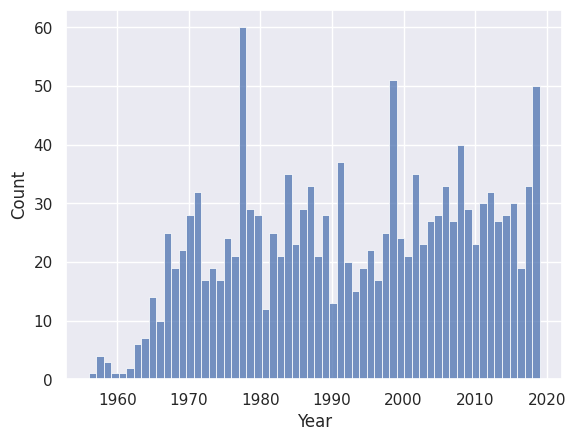

In [24]:
sns.histplot(df_train['Year'], bins=60)

## Test dataset preprocessing

In [29]:
df_test = df_test.drop(labels=['Title'], axis=1)
df_test = df_test.drop(columns=['Artist'])

In [31]:
df_test.duplicated().sum()

0

In [32]:
df_test_vectorizer = vectorizer.transform(df_test['Genre']).toarray()
df_test['GenreCluster'] = kmeans.predict(df_test_vectorizer);

In [33]:
df_test

,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,GenreCluster
1890,canadian folk,1967,132,17,41,-16,11,35,229,92,4,66,0,1
1893,album rock,1967,125,73,41,-6,9,44,430,37,3,72,0,0
1106,album rock,1978,101,88,78,-4,4,89,265,39,3,74,0,0
693,neo mellow,2017,80,66,55,-7,10,52,244,39,3,66,1,1
1176,glam rock,1980,82,45,51,-7,13,33,230,36,3,51,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,dance pop,1986,110,31,67,-14,11,27,353,41,3,56,0,2
757,dutch pop,2018,197,64,18,-7,12,52,241,11,4,30,1,3
111,modern rock,2004,94,84,52,-4,10,46,215,0,3,54,1,7
1085,dutch indie,1978,92,61,63,-7,68,55,223,60,3,48,0,4


In [34]:
df_test = df_test.drop(columns='Genre')
df_test['GenreCluster'] = df_test['GenreCluster'].astype(str)
df_test.head()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,GenreCluster
1890,1967,132,17,41,-16,11,35,229,92,4,66,0,1
1893,1967,125,73,41,-6,9,44,430,37,3,72,0,0
1106,1978,101,88,78,-4,4,89,265,39,3,74,0,0
693,2017,80,66,55,-7,10,52,244,39,3,66,1,1
1176,1980,82,45,51,-7,13,33,230,36,3,51,0,7


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 1890 to 1552
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          599 non-null    int64 
 1   BPM           599 non-null    int64 
 2   Energy        599 non-null    int64 
 3   Danceability  599 non-null    int64 
 4   Loudness      599 non-null    int64 
 5   Liveness      599 non-null    int64 
 6   Valence       599 non-null    int64 
 7   Length        599 non-null    int64 
 8   Acousticness  599 non-null    int64 
 9   Speechiness   599 non-null    int64 
 10  Popularity    599 non-null    int64 
 11  is_recent     599 non-null    int64 
 12  GenreCluster  599 non-null    object
dtypes: int64(12), object(1)
memory usage: 65.5+ KB


## One hot encoding

In [36]:
combined_data = pd.concat([df_train, df_test])

# artist_dummies = pd.get_dummies(combined_data, columns=['Artist'], prefix='artist', dtype=int)
# genre_dummies = pd.get_dummies(combined_data, columns=['GenreCluster'], prefix='genre', dtype=int)
# data_encoded = pd.concat([combined_data, artist_dummies, genre_dummies], axis=1)
# data_encoded = data_encoded.drop(['Artist', 'GenreCluster'], axis=1)

genre_dummies = pd.get_dummies(combined_data, columns=['GenreCluster'], prefix='genre', dtype=int)
data_encoded = pd.concat([combined_data, genre_dummies], axis=1)
data_encoded = data_encoded.drop(['GenreCluster'], axis=1)


df_train = data_encoded[:len(df_train)]
df_test = data_encoded[len(df_train):]

df_train = df_train.loc[:, ~df_train.columns.duplicated()]
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

In [37]:
df_train = df_train.drop(columns=['Year'])
df_test = df_test.drop(columns=['Year'])

In [38]:
df_train

,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
387,123,73,48,-8,11,87,140,57,17,65,...,0,0,0,0,0,0,0,0,1,0
1853,99,21,34,-17,18,29,218,40,3,70,...,0,0,0,0,0,0,0,0,1,0
1715,71,58,39,-7,22,38,295,47,3,63,...,0,0,0,0,0,0,1,0,0,0
601,135,23,40,-9,11,28,222,89,4,61,...,0,0,0,0,1,0,0,0,0,0
971,159,16,41,-22,12,42,199,88,3,77,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,124,39,61,-11,11,22,255,53,4,67,...,0,1,0,0,0,0,0,0,0,0
1315,84,90,57,-8,9,88,225,2,5,83,...,0,0,0,0,0,0,0,1,0,0
1501,120,57,51,-7,11,16,280,4,3,71,...,0,1,0,0,0,0,0,0,0,0
1733,136,99,61,-5,11,23,343,0,15,65,...,0,1,0,0,0,0,0,0,0,0


In [39]:
df_test

,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
1890,132,17,41,-16,11,35,229,92,4,66,...,0,1,0,0,0,0,0,0,0,0
1893,125,73,41,-6,9,44,430,37,3,72,...,1,0,0,0,0,0,0,0,0,0
1106,101,88,78,-4,4,89,265,39,3,74,...,1,0,0,0,0,0,0,0,0,0
693,80,66,55,-7,10,52,244,39,3,66,...,0,1,0,0,0,0,0,0,0,0
1176,82,45,51,-7,13,33,230,36,3,51,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,110,31,67,-14,11,27,353,41,3,56,...,0,0,1,0,0,0,0,0,0,0
757,197,64,18,-7,12,52,241,11,4,30,...,0,0,0,1,0,0,0,0,0,0
111,94,84,52,-4,10,46,215,0,3,54,...,0,0,0,0,0,0,0,1,0,0
1085,92,61,63,-7,68,55,223,60,3,48,...,0,0,0,0,1,0,0,0,0,0


In [40]:
df_train.columns, df_test.columns

(Index(['BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence',
        'Length', 'Acousticness', 'Speechiness', 'Popularity', 'is_recent',
        'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
        'genre_6', 'genre_7', 'genre_8', 'genre_9'],
       dtype='object'),
 Index(['BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence',
        'Length', 'Acousticness', 'Speechiness', 'Popularity', 'is_recent',
        'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
        'genre_6', 'genre_7', 'genre_8', 'genre_9'],
       dtype='object'))

In [41]:
df_train.to_csv('data_train_class10.csv', index=False)
df_test.to_csv('data_test_class10.csv', index=False)